Hello...


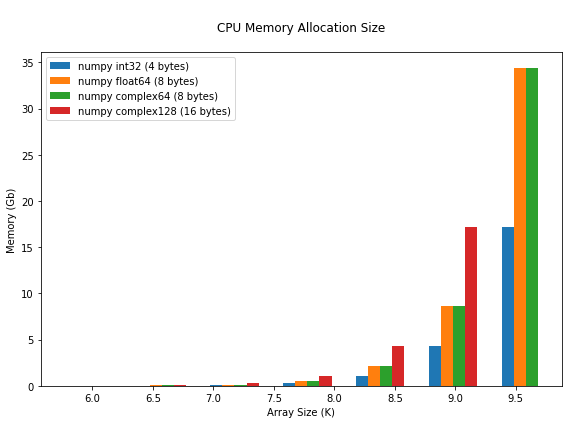

Done.


In [28]:
import numpy 
import cupy
import math
from sys import getsizeof
from humanize import naturalsize
from matplotlib import pyplot as plt

print( "Hello..." )

def test_array_memory( use_gpu , debug=0) : 
    row_cnt = 1; col_cnt = 1
    fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 6*row_cnt) )
    charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
    chart_idx = 0
    chart = charts[ chart_idx ]
    chart_idx +=1 

    if debug : 
        print( f"use_gpu = {use_gpu}" )
        print( flush=1 )

    np = cupy if use_gpu else numpy

    data_types = [ np.int_, np.double, np.csingle, np.cdouble ]
    #data_types = [ np.int_, ][::-1]
    
    dx = 0
    bar_count = 0 

    for idx, data_type in enumerate( data_types ):
        array = np.array( 1, data_type )
        data_type_size = array.nbytes
        
        type_str = f"{data_type}".split( " " )[-1].split(".")[-1].split( "'")[0]
        type_str = [ "numpy ", "cupy "][use_gpu] + type_str
        type_str = f"{type_str } ({data_type_size} bytes)"
        
        debug and print( type_str, flush=1 )
        
        resolutions = []
        memories = []
        label = type_str
        
        res = 9
        no_error = True 
        
        while no_error  : 
            array = None
            try : 
                res += 1
                resolution = 2**res 
                array = np.zeros( (resolution, resolution ), data_type )
                size = array.nbytes
                size_m = size / 10**6 
                debug and print( f"resolution = {resolution:_}, array size = {resolution**2:_}, size = {size:_}, size_m = {size_m:_.1f} Mb, natural size = {naturalsize(size)}", flush=1 )
                
                resolutions.append( resolution**2 )
                memories.append( size )
            except Exception as e:
                no_error = False 
                debug and print( e, flush=1 )
            finally :
                del array
            pass
        pass
        
        #x =  resolutions
        x = numpy.log10( numpy.array( resolutions ) )
        y = numpy.array( memories )/10**9
        
        w = 0.1
        n = len(data_types)
        dx = w*(idx - n/2)
        chart.bar( x + dx, y, label=label, width=w ) 
    
        debug and print( ) 
    pass

    device = [ "CPU", "GPU" ][ use_gpu ]
    chart.set_title( f"\n{device} Memory Allocation Size\n" )
    chart.set_xlabel( "Array Size (K)" )
    chart.set_ylabel( "Memory (Gb)" )
    chart.legend() 
    
    plt.tight_layout(); plt.show()

    print( "Done." )
pass # -- test_array_memory

test_array_memory( use_gpu = 0, debug=0)

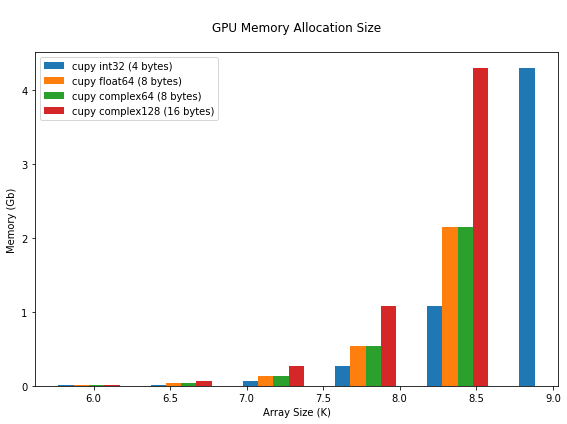

Done.


In [29]:
test_array_memory( use_gpu = 1, debug=0)